# Elements Of Data Processing (2020S1) - Week 2


# DataFrames

DataFrames represents tabular data structure and can contain multiple rows and columns.  They can be thought of as a dictionary of Series objects, and are one of the most important data structures you will use to store and manipulate information in data science.

A DataFrame has both row and column indices.

The Pandas DataFrame structure contains many useful methods to aid your analysis.  Recall from week 1 the [API reference](https://pandas.pydata.org/pandas-docs/stable/reference/index.html) is available which details all of the functionality provided by pandas.  You will particularly need con consult the [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) reference page.


<img src="images/DF.jpg">


In [ ]:
# as before, begin by importing the pandas library
import pandas as pd

In [ ]:
# create a new series of the population
Aus_Population = {'1990':17065100, '2000':19153000, '2007':20827600,
                 '2008':21249200,'2009':21691700,'2010':22031750,
                 '2011':22340024, '2012':22728254, '2013':23117353}
population = pd.Series(Aus_Population)

In [ ]:
# we will reuse the emissions data from last week
Aus_Emission = {'1990':15.45288167, '2000':17.20060983, '2007':17.86526004,
                '2008':18.16087566,'2009':18.20018196,'2010':16.92095367,
                '2011':16.86260095, '2012':16.51938578, '2013':16.34730205}

co2_Emission = pd.Series(Aus_Emission)

In [ ]:
# verify the values in the series
population

In [ ]:
# create a DataFrame object from the series objects
australia = pd.DataFrame({'co2_emission':co2_Emission, 'Population':population})
australia

In [ ]:
# create a DataFrame from a csv file
countries = pd.read_csv('data/countries.csv',encoding = 'ISO-8859-1')

In [ ]:
# check the top 10 countries in the DataFrame
countries.head(10) # the default value is set to 5

In [ ]:
# count the number of countries in each region
countries.Region.value_counts()

In [ ]:
# set the name of countries as the index
countries.set_index('Country')


In [ ]:
# create a new DataFrame for the CO2 emission from a csv file
emission = pd.read_csv('data/emission.csv',encoding = 'ISO-8859-1')
#emission.head()

In [ ]:
# Create a subset of emission dataset for Year 2010
yr2010 = emission['2010']
names  = emission['Country']
yr2010.index = names
type(yr2010)

In [ ]:
# Sort column values using sort_values 
yr2010.sort_values()


In [ ]:
#Sort column values to find the top countries
yr2010.sort_values(ascending = False)

### <span style="color:blue"> Exercise 1 </span>

- Retrieve the mean, median of CO2 emission generated in 2012 by all countries.
- Retrieve the top 5 countries with the most CO2 emission in 2012. How about the 5 countries with the least emission? (remember that sort_values has an **ascending** parameter that is set to True by default).
- Retrieve the sum of CO2 emission for all years and find the 2 years with the maximum CO2 emission.





In [ ]:
##answer here



# More Sort Operations
Pandas allows you to sort your DataFrame by rows/columns as follows:

In [ ]:
# Sort column values of a DataFrame
sorted2012 = emission.sort_values( by = '2012',ascending = False )
sorted2012

In [ ]:
# Sort column values using two columns
sorted2012 = emission.sort_values( by = ['2012','2013'],ascending = [False, True] )
sorted2012

#### Slicing using the .loc and .iloc method
Slicing allows you to take part of your DataFrame.  You can use the .iloc method to select data using row/column numbers, or use .loc to select data using row/column headings.  See [this article](https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/) for more examples

In [ ]:
# Slicing using a range of rows and range of columns 
emission.iloc[2:5,2:6]

In [ ]:
# Slicing using specific rows and specific columns
emission.loc[[3,5],['Country','1990']]

In [ ]:
# Specific rows and all columns

emission.loc[[3,5],:]

In [ ]:
# All rows and specific columns
emission.loc[:,['Country','1990']]

### <span style="color:blue"> Exercise 2 </span>

Create a DataFrame object that has the name, region and IncomeGroup of the top 10 emitting countries in 2012.






In [ ]:
##answer here



## Groupby
The Groupby method lets you separate the data into different groups based off shared characteristics.  For example, we could group countries by region or income range and then analyse those groups individually.  The official documentation on groupby can be found [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html).  [This tutorial](https://www.marsja.se/python-pandas-groupby-tutorial-examples/) is also well worth reading.

#### Groupby
<img src="files/images/groupby1.jpg">

### <span style="color:blue"> Exercise 3 </span>

Using Countries data frame, group the rows using the Region column.
* Show the size of each group
* Find the number of high income and low income countries by region

In [ ]:
##answer here



# Basic visualization with Python

In these exercises you will:

- learn how to visualize a set of data using a Python library called `matplotlib`.
- find out different forms of visualization, such as bar charts, histograms, scatter plot, and boxplot.

You will be able to transform a set of data into an appropriate visualization form.

`matplotlib` is a Python 2D plotting library that enables you to produce figures and charts, both in a screen or in an image file. 

The following example demonstrates a simple plot of the top 100 emissions in 2010. 


# Why visualisation?
* Converting data into a visual format
    * Reveals the structure of the data, information in the data
    * Characteristics of the data, relationships between objects or relationships between features
    * Simplifies the data
* See patterns
* Spot anomalies, outliers
* Visualisation can help show data quality
* Basic visualisations: boxplots, histograms, scatter plots, bar plots

# Elements of a good visualisation
* Meaningful title.
* Appropriate scales, annotation
* Suitability to the dataset and the context of the data question
* Can be interpreted on its own.
    * Caption can be used to explain the context, the dataset, and a brief interpretation of plot, where appropriate.
* Has no redundant, information unimportant to the plot. 
* Customisation and improvisation may be required.

In [ ]:
# slice the data to get top 100 emissions in 2010

yr2010_sorted = yr2010.sort_values(ascending = False)
top100_yr2010 = yr2010_sorted[0:100]


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.boxplot(top100_yr2010) # a boxplot of the top 100 emissions in year 2020

## Scatter plot


Scatter plot is often used to display the relationship between two variables (plot as x-y pairs). In this scatter plot example, we use [famous Iris data set](http://en.wikipedia.org/wiki/Iris_flower_data_set). The data is available [here](data/iris.csv). This data set provides measurements on various parts of three types of Iris flower (Iris setosa, Iris versicolour, and Iris virginica). For each type, there are 50 measurements, or samples. Each data row in the CSV file contains (1) sepal length, (2) sepal width, (3) petal length, (4) petal width, and (5) the type of Iris flower.

The following code generates the scatter plot between petal length and petal width of the three Iris types.

### Relationship between two variables 

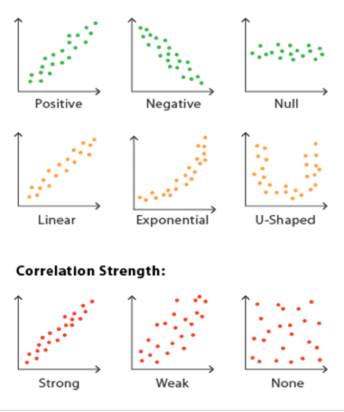

When there are many data points, dots tend to overlap

- Reduce dot size 
- Sampling
- Jitter (for moderate overplotting)
> "Jittering" is adding a bit of random noise to scatterplots, to better see the information contained in the data
- Use other plots

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

iris=pd.read_csv('data/iris.csv',encoding = 'ISO-8859-1',header=None)
setosa=iris.loc[iris[4]=='Iris-setosa']
versicolor=iris.loc[iris[4]=='Iris-versicolor']
virginica=iris.loc[iris[4]=='Iris-virginica']


plt.scatter(setosa.iloc[:,2],setosa.iloc[:,3],color='green')
plt.scatter(versicolor.iloc[:,2],versicolor.iloc[:,3],color='red')
plt.scatter(virginica.iloc[:,2],virginica.iloc[:,3],color='blue')
plt.xlim(0.5,7.5)
plt.ylim(0,3)
plt.ylabel("petal width")
plt.xlabel("petal length")
plt.grid(True)



From the scatter plot, we may be able to suggest a particular type of relationship or a formation of clusters. In the example above you may notice that, for Iris versicolor, the samples with longer petal tend to have wider petal. You can also see clearly that there exist clusters of these three Irises. As such, the measurements of petal and sepal can help identifying the type of Iris flower. This example demonstrates how botanists may indentify a certain species from phenotype characteristics.

### <span style="color:blue"> Exercise 4 </span> 


Modify the example above to generate the scatter plot of petal length and sepal length.


In [ ]:
##answer here





## Bar chart

Bar chart is probably the most common type of chart. It displays a property or properties of a set of different entities. Bar chart is typically used to provide comparison, or to show contrast between different entities. For example, the bar chart below displays the GNP per capita of the three poorest and the three richest countries in the world (based on 2004 GNP per capita):

Summarise data points over a categorical variable.
* X-axis: categorical variable 
* Y-axis: numeric quantity

Histograms:
* X-axis is intervals of a numeric variable 
* Y-axis is the frequency or frequency-density 
* Only sensible to be ordered in one way

Bar plots:
* X-axis is a categorical variable 
* Y-axis is a numeric quantity 
* Can be in any order

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import calendar
from numpy import arange

countries = ['Burundi','Ethiopia','Rep of Congo','Switzerland','Norway','Luxembourg']
gnp = [90,110,110,49600,51810,56380] # GNP per capita (2004)
plt.bar(arange(len(gnp)),gnp)
plt.xticks( arange(len(countries)),countries, rotation=30)
plt.show()

### <span style="color:blue"> Exercise 5 </span> 


Modify the bar chart example to plot the average maximum temperature in all major Australian cities. The data is available [here](data/max_temp.csv). 


In [ ]:
##answer here





In a clustered bar chart, you can display a few measurements from the entities of interest. For example, the clustered bar chart below simultaneously shows the number of births and deaths in four countries of interest. The number of births is displayed as the blue-colored bar and the number of deaths as the red-colored bar:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import calendar
from numpy import arange

countries = ['Afghanistan', 'Albania', 'Algeria', 'Angola']
births = [1143717, 53367, 598519, 498887]
deaths = [529623, 16474, 144694, 285380]
plt.bar(arange(len(births))-0.3, births, width=0.3)
plt.bar(arange(len(deaths)),deaths, width=0.3,color='r')
plt.xticks(arange(len(countries)),countries, rotation=30)

## Histogram

Histogram displays a distribution of population samples (typically a large set of data like digital images or age of population). The following example creates a histogram of age within a small number of samples (assumes these are the age of your classmates).

* Frequency distribution of a set of continuous data points.
* Inspect the underlying distribution (shape), is it normal? skewed? outliers?

Histograms with equal-width bins is the Commonly used histograms

* X-axis: Divide the range of values into consecutive, non-overlapping, and equal width intervals.
* Y-axis: height proportional to the frequency of the bin

Histogram with variable-width bins

* X-axis: Divide the range of values into consecutive, non-overlapping, and variable width intervals.
* Y-axis: height proportional to frequency density—the number of cases per unit of the variable. The rectangle has its area proportional to the frequency

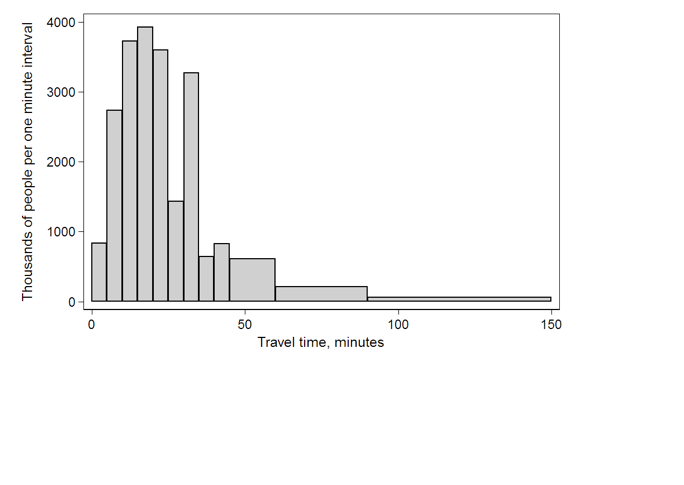

Histograms of the same dataset may look different with different bins selected.

Problem: Hard to choose an appropriate bin size for histogram 
* Too small → normal objects in empty/rare bins, false positive
* Too big → outliers in some frequent bins, false negative

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt


ages = [17,18,18,19,21,19,19,21,20,23,19,22,20,21,19,19,14,23,16,17]
plt.hist(ages, bins=10)
plt.grid(which='major', axis='y')
plt.show()

### <span style="color:blue"> Exercise 6 </span> 


Change the number of bins in the previous example to 20.
Plot the histogram
